<a href="https://colab.research.google.com/github/D0905-ux/ML_League_Comp_1_Code/blob/main/Code_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data**


This set of cells imports the data from the competition.I have simply let the same cells be from the time i turned this kaggle notebook to colab. *This is not my code*

In [42]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

ml_league_supervised_learning_competition_path = kagglehub.competition_download('ml-league-supervised-learning-competition')

print('Data source import complete.')

Data source import complete.


**The Code Starts here**

First we import all the necessary libraries to plot, analyse and work with the data.

In [43]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor,HistGradientBoostingRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import copy
print("All the libraries have been successfully downloaded")

All the libraries have been successfully downloaded


Here, we download the test and train csv files in different handlers namely *df_train* and *df_test* respectivelly using the pandas libraries read_csv function

In [44]:
df_train=pd.read_csv(ml_league_supervised_learning_competition_path +"/train.csv")
df_test=pd.read_csv(ml_league_supervised_learning_competition_path +"/test.csv")

Now, once we have read the csv files, we use the info method to find crucial information about the dataframe such as :


1. The number of features: There are 18 features (yield is target output and id is for the numbering only)

2. The types of features : All features here are numerical categorical

3. The number of missing values: The number of Non-Nulls as can be seen is all the same same so  we can assume no missing values are present

4. The number of Nan values: Nan values can interfere with the training of regression models but as seen there no Null (Nan) values.



In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

The same is done for df_test but as seen, there is no yield column.

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   Row#                  10000 non-null  float64
 2   clonesize             10000 non-null  float64
 3   honeybee              10000 non-null  float64
 4   bumbles               10000 non-null  float64
 5   andrena               10000 non-null  float64
 6   osmia                 10000 non-null  float64
 7   MaxOfUpperTRange      10000 non-null  float64
 8   MinOfUpperTRange      10000 non-null  float64
 9   AverageOfUpperTRange  10000 non-null  float64
 10  MaxOfLowerTRange      10000 non-null  float64
 11  MinOfLowerTRange      10000 non-null  float64
 12  AverageOfLowerTRange  10000 non-null  float64
 13  RainingDays           10000 non-null  float64
 14  AverageRainingDays    10000 non-null  float64
 15  fruitset            

** Feature Enginnering **

First we start by seeing the heatmap of the training data, here higher value of correlation mean that the features are highly correlated and thus is used to create new features and help train the model.

<Axes: >

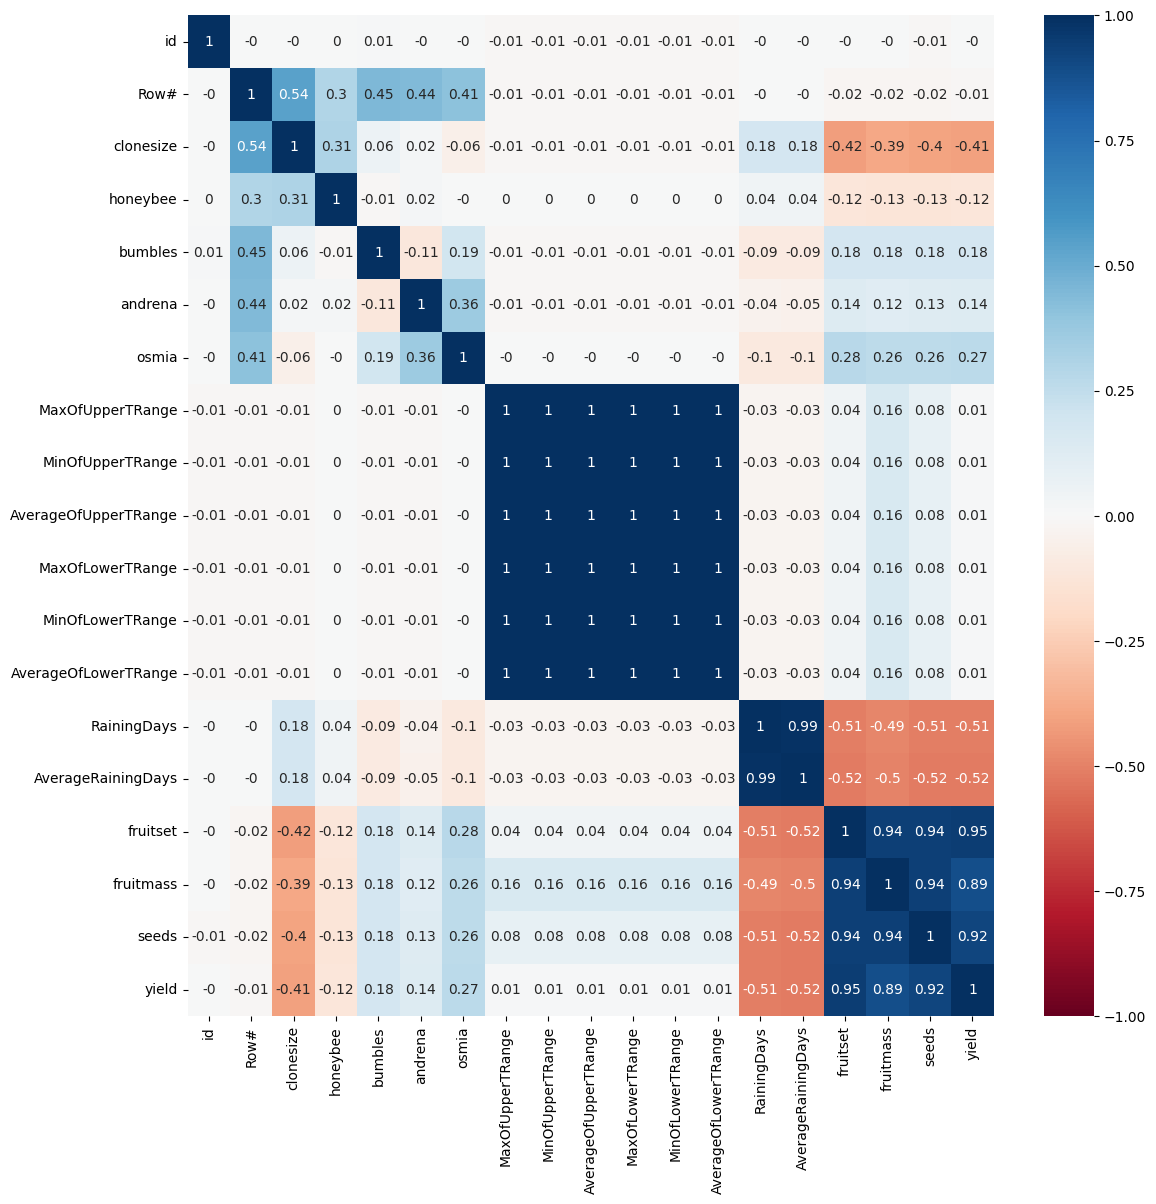

In [47]:
#finding the correclations of features using heatmap
corr=df_train.corr().round(2)   #We are storing all the coorelational values in corr
#print(corr)
plt.figure(figsize=(13,13))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True )     #We create the heatmap using seaborn's heatmap library

Looking at the realtionships of the features and yield, we see that features *fruitmas*s, *fruitset* and *seeds* have the highest correlation score to yield and thus new features are made using these to help the models have more features to perform better.

In [48]:
#creating new features based on correlation heatmap
df_train['mass_set']=df_train['fruitmass']/df_train['fruitset']
df_train['mass_seed']=df_train['fruitmass']/df_train['seeds']
#repeating the same for testing data
df_test['mass_set']=df_test['fruitmass']/df_test['fruitset']
df_test['mass_seed']=df_test['fruitmass']/df_test['seeds']

Now once we have made the features, we will plot all the dataponits of the features against yield to see which features most closely relate to the yield and is beneficial for the model.

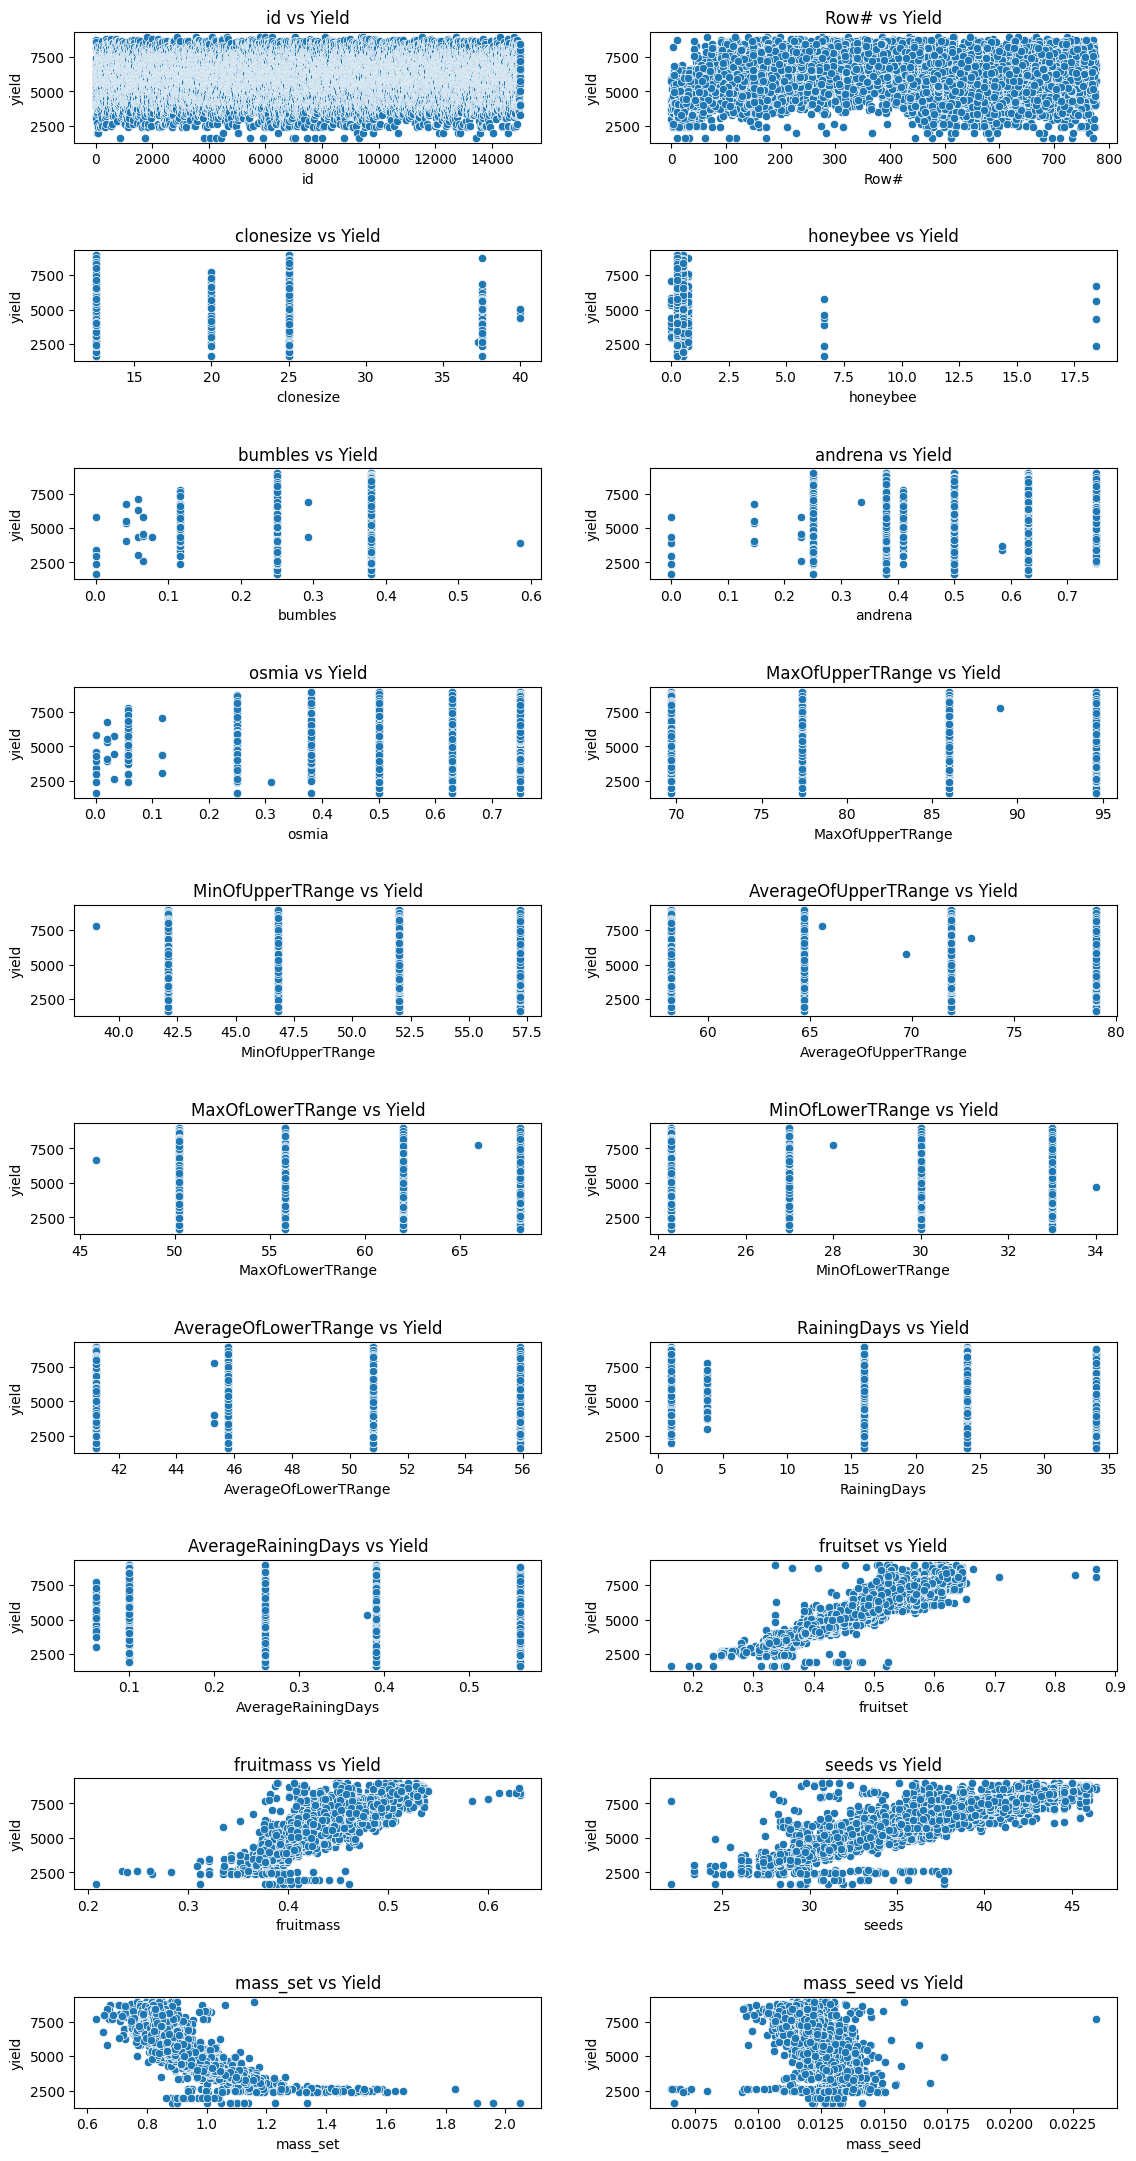

In [49]:
# List of features to plot against 'yield'
features = ['id','Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
            'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
            'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
            'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds','mass_set','mass_seed']

# Set up the figure for subplots
cols = 2
rows = 11
#Declare the total size of all figure
plt.figure(figsize=(12,24))

for i, feature in enumerate(features):
    plt.subplot(rows, cols,i+1)
    sns.scatterplot(data=df_train, x=feature, y='yield')
    plt.title(f'{feature} vs Yield')
plt.tight_layout(pad=3.0)   # we make it neat with padding between the subplots.


A good feature is one which gives the model a almost linear relation to yield on the graph.Based off this, the analysis of various features is as given below:


1.   **id** :   It is simply a counter and is not a good feature for training.

2.   **Row#**:  It is a feature which is too chaotic as it spreads all over the yield without any pattern.

3.  ***clonesize***: It has its values in a very particular numbers and is not spread, in a sense it is quantized i.e, it only has particular values and thus is not a good fit for the model.
  There are other features which also fall inot this category :
                           

                        *   honeybee
                        *  MaxofUpperTRange
                        *   MinofUpperTRange
                        *   AverageofUpperTRange
                        *   MaxofLowerTRange
                        *   MinofLowerTRange
                        *   AverageofLowerTRange
                        *   RainingDays
                        *   AverageRainingDays



4.   **fruitset**: This feature has the ideal correlation we need with yield which is reflected in its good correlation score.
      There are other features which also fall inot this category:


                        * bumbles
                        * andrena
                        * osmia
                        * fruitset
                        * fruitmass
                        * seeds
                        * mass_set
                        * mass_seed

These features will be used for training the model.



















In [50]:
X=df_train[['bumbles','andrena','osmia','fruitset','fruitmass','seeds','mass_set','mass_seed']]
y=df_train['yield']
X_test=df_test[['bumbles','andrena','osmia','fruitset','fruitmass','seeds','mass_set','mass_seed']]

From the taining dataset, we carve out a section for validation, this is important because it prevents overfitting of the model and also helps give a idea of the accuracy of model before using it for predictions.

The sklearn module gives fucntion train_test_split which helps , we enter the training data (X),the target (y), the split for the training and validation data (here 0.3 or 30/70 split for validation and training respectively), the random_state ensures that the results stay consistent over multiple rums of the program.

In [51]:
# creating train and test sets

X_train,X_val,y_train,y_val=train_test_split(X, y, test_size=0.3, random_state=42)


The data in the geatures can tend to be very large or vary over a big region, but models work best when the data is more concentrated or rather small in magnitude, to do so, we scale down the data.

It is important to note that we use fit_transform for X_train and the weights the transformer picks up here is used to transform the rest of the data using the transform function.

This is done cause the testing and validation data should also be scaled by the same margin for good performance.

The scaling is not done before the split as the numbers from the validation data will be used in fit_transform and thus will be a formof cheating as the **data is leaking** from the validation set to the training set.

In [52]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

After running multiple models i found that it would be best to opt for a good combination of a number of models where only the best results of each are taken abd thus help fight the problems caused by using a single model.

Thus the** Voting Regressor** along with 3 of the best configuration out of the tested ones is used here.

In [53]:
#Defining the models
model1 =BaggingRegressor(estimator=HistGradientBoostingRegressor(),
                        n_estimators= 13, random_state=42)
model2=GradientBoostingRegressor()
model3=RandomForestRegressor()
model = VotingRegressor([('Br', model1), ('Gb', model2), ('Rf', model3)])

I had tried using optuna but the model was overfitting if the number of iterations crossed 20 and if it was lower then the model hardly had any improvement on the validation mse score.

Now we train the model on the training data with the target variables and store theparameters in the provess.

In [54]:
model.fit(X_train_scaled, y_train)         #Train the model

VotingRegressor(estimators=[('Br',
                             BaggingRegressor(estimator=HistGradientBoostingRegressor(),
                                              n_estimators=13,
                                              random_state=42)),
                            ('Gb', GradientBoostingRegressor()),
                            ('Rf', RandomForestRegressor())])

Oncethe model has been trained we make predictions on the validation data and use the MSE(Mean Squared Error) criteria for evaluating the data.A lower score would signify a better model.

In [55]:
y_pred=model.predict(X_val_scaled)
mse=mean_squared_error(y_val,y_pred)
rmse=np.sqrt(mse)
print(f"RMSE score on test data: {rmse:.3f}")

RMSE score on test data: 367.402


These are the different models and their rmse scores. I had done many more models but only wrote down the lowest ones.

Another thing noticed was that scaling did not habe a very big affect on the scoring, this shows that the data might be synthetically gemerated rather then being a real life observation.

In [56]:
                                      #Scaled                                                          #Unscaled
'''
1.LinearRegressor:                    402.699                                                         402.699
2.GradientBoostingRegressor:          369.672                                                         369.759
3.HistGradientBoostingRegressor:      369.033                                                         369.033
4.RandomForestRegressor:              386.659                                                         386.906
5.BaggingRegressor
(estimator=
HistGradientBoostingRegressor(),      367.548
n_estimators=10, random_state=42)     '''

'\n1.LinearRegressor:                    402.699                                                         402.699\n2.GradientBoostingRegressor:          369.672                                                         369.759\n3.HistGradientBoostingRegressor:      369.033                                                         369.033\n4.RandomForestRegressor:              386.659                                                         386.906\n5.BaggingRegressor\n(estimator=\nHistGradientBoostingRegressor(),      367.548\nn_estimators=10, random_state=42)     '

We finally predict the yield for the testing data and store it onto predictions.

In [57]:
predictions = model.predict(X_test_scaled)

We do a finalcheck to make sure there are no missing values and push it into the submission csv file.

In [58]:
predictions.shape

(10000,)

The submission file is made by copying the test_df file and just keeping the id column, while adding the predictions into the yield column and submitting the same.

In [59]:
df_output=df_test.copy()
df_sub=df_output[['id']].copy()
df_sub['yield'] = predictions
df_sub.to_csv("Submission.csv",index=False)
print(df_sub.head())

      id        yield
0  15000  5505.207214
1  15001  6413.316946
2  15002  5547.850166
3  15003  3094.017270
4  15004  3412.343684
